# Data Scientist Analysis Exercise, July 2020
## Mayor Garcetti's Innovation Team
### Author: Hovanes Gasparian
#### Exercise Option 4: County Assessor Parcel Dataset

#### Questions for Parcel within the City of Los Angeles

1. How many parcels are in the City of Los Angeles?
2. How many single-family parcels are there in the City of Los Angeles?
3. What is the average square footage for different types of parcels? 
  * Does this vary by region within the city?
4.  How has housing changed over time in the City of Los Angeles?
5. What (if anything) does this dataset tell you about opportunities to build more affordable housing?
6.  Based on your analysis, please share any changes to services, programs, or
policies that the City should consider.




---



In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
%%time
parcels = pd.read_csv('./Assessor_Parcels_Data_-_2006_thru_2019.csv')

<string>:2: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.


CPU times: user 3min 58s, sys: 1min 12s, total: 5min 10s
Wall time: 4min 57s


In [3]:
parcels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33348628 entries, 0 to 33348627
Data columns (total 51 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ZIPcode                      object 
 1   TaxRateArea_CITY             object 
 2   AIN                          int64  
 3   RollYear                     int64  
 4   TaxRateArea                  int64  
 5   AssessorID                   object 
 6   PropertyLocation             object 
 7   PropertyType                 object 
 8   PropertyUseCode              object 
 9   GeneralUseType               object 
 10  SpecificUseType              object 
 11  SpecificUseDetail1           object 
 12  SpecificUseDetail2           object 
 13  totBuildingDataLines         int64  
 14  YearBuilt                    int64  
 15  EffectiveYearBuilt           int64  
 16  SQFTmain                     int64  
 17  Bedrooms                     int64  
 18  Bathrooms                    int64  
 19

In [4]:
parcels.TaxRateArea_CITY.value_counts()

LOS ANGELES         11080935
unincorporated       4649003
LONG BEACH           1162726
SANTA CLARITA         828233
LANCASTER             567351
                      ...   
HUNTINGTON PARK         2201
CUDAHY                  1551
BRADBURY                1263
VERNON                  1197
MAYWOOD                  658
Name: TaxRateArea_CITY, Length: 146, dtype: int64

In [5]:
la_parcels = parcels[parcels.TaxRateArea_CITY == "LOS ANGELES"]

In [6]:
del parcels

---

### How many parcels are in the City of Los Angeles?

824,132

In [8]:
la_parcels.AIN.nunique()

824132

---

### How many single-family parcels are there in the City of Los Angeles?
481,650

In [13]:
la_parcels[la_parcels.PropertyType == 'SFR']['AIN'].nunique()

481650

---

### What is the average square footage for different types of parcels?
| Property Type  | Square Footage |
|:---------------|-----------:|
| N/A            |  3609.58   |
| Commercial/Industrial | 12359    |
| Condominium    |  1311.74   |
| Other          |  6144.49   |
| Residential-Income |  5871.66   |
| Single Family Residence |  1812.35   |
| Vacant         |    85.82   |

In [22]:
la_parcels.groupby('PropertyType')['SQFTmain'].mean()

PropertyType
        3609.580614
C/I    12358.525902
CND     1311.739144
OTH     6144.488471
R-I     5871.662372
SFR     1812.349609
VAC       85.822707
Name: SQFTmain, dtype: float64

### Does this vary by region within the city?
Yes, it most certainly does. If we look at the average breakdown by just zipcode, the range is quite drastic...

In [42]:
round(la_parcels.groupby('ZIPcode5')['SQFTmain'].mean().describe(), 2)

count        221.00
mean       20098.26
std       144083.31
min            0.00
25%         1956.00
50%         2951.48
75%         4938.00
max      2081275.00
Name: SQFTmain, dtype: float64

####  If we just focus on Single Family Residences, the range is still significant. The median zipcode has an average square footage of 1719, but some zip codes have average square footages that are over 10 times as much. 

In [44]:
la_parcels[la_parcels.PropertyType == 'SFR'].groupby(by='ZIPcode5')['SQFTmain'].mean().describe()

count      167.000000
mean      2198.304207
std       2063.753370
min          0.000000
25%       1364.784547
50%       1719.573562
75%       2331.534842
max      21398.666667
Name: SQFTmain, dtype: float64

---

### How has housing changed over time in the City of Los Angeles?

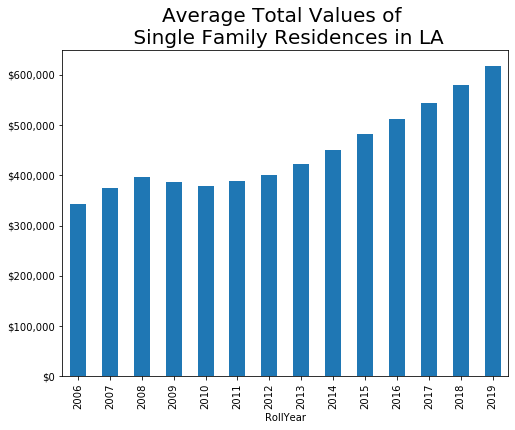

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))
la_parcels[la_parcels.PropertyType == 'SFR'].groupby('RollYear')['TotalValue'].mean().plot(kind='bar');
plt.title('Average Total Values of \n Single Family Residences in LA', fontsize=20)

formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

As we can see in the graph above, the average total values for single family homes in Los Angeles have grown over time, almost doubling over the past 15 years.

---

### What (if anything) does this dataset tell you about opportunities to build more affordable housing?

If we look at that above graph broken down by growth in number of parcels based on price, we see a stark trend. 

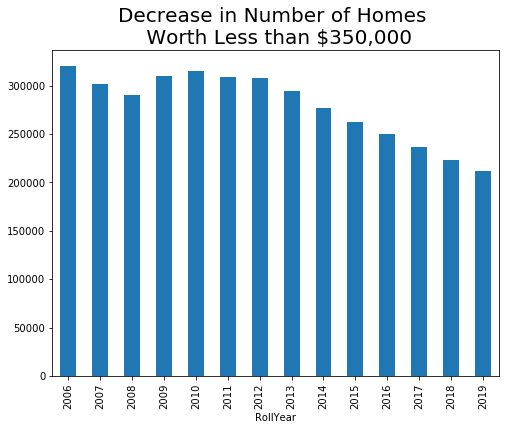

In [78]:
fig, ax = plt.subplots(figsize=(8, 6))
la_parcels[(la_parcels.PropertyType == 'SFR') & (la_parcels.TotalValue < 350_000)].groupby('RollYear')['TotalValue'].count().plot(kind='bar')
plt.title('Decrease in Number of Homes \n Worth Less than $350,000', fontsize=20);

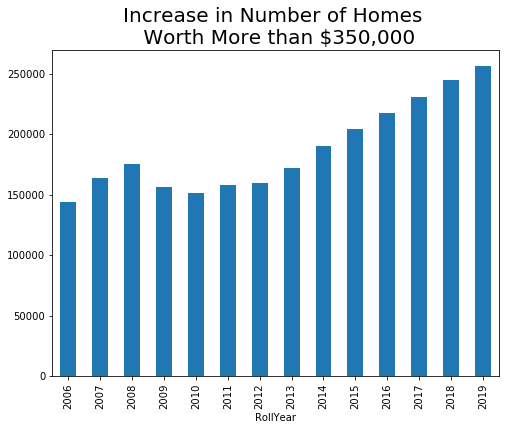

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))
la_parcels[(la_parcels.PropertyType == 'SFR') & (la_parcels.TotalValue > 350_000)].groupby('RollYear')['TotalValue'].count().plot(kind='bar')
plt.title('Increase in Number of Homes \n Worth More than $350,000', fontsize=20);

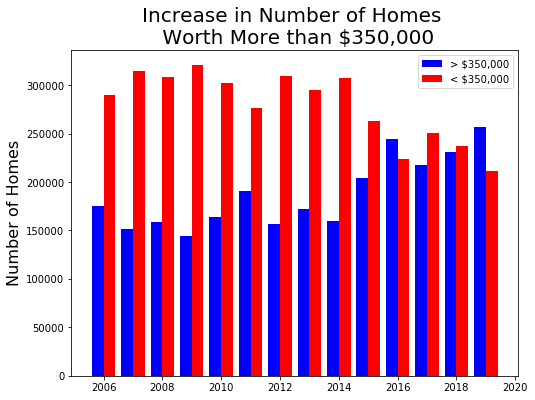

In [124]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(la_parcels.RollYear.unique()-.2, la_parcels[(la_parcels.PropertyType == 'SFR') & (la_parcels.TotalValue > 350_000)].groupby('RollYear')['TotalValue'].count(), color='b', width=.4)
ax.bar(la_parcels.RollYear.unique()+.2, la_parcels[(la_parcels.PropertyType == 'SFR') & (la_parcels.TotalValue < 350_000)].groupby('RollYear')['TotalValue'].count(), color='r', width=.4)
plt.title('Increase in Number of Homes \n Worth More than $350,000', fontsize=20)
ax.legend(['> $350,000', '< $350,000'])
plt.ylabel('Number of Homes', fontsize=16);

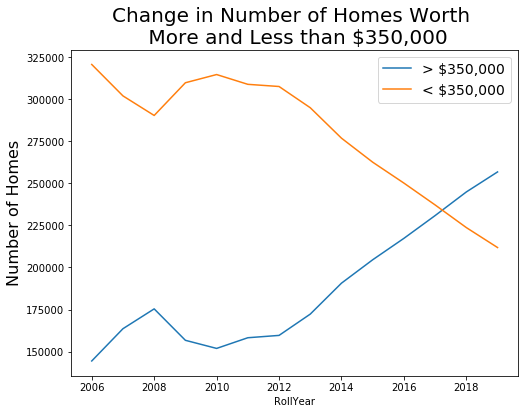

In [145]:
plt.figure(figsize=(8, 6))
la_parcels[(la_parcels.PropertyType == 'SFR') & (la_parcels.TotalValue > 350_000)].groupby('RollYear')['TotalValue'].count().plot()
la_parcels[(la_parcels.PropertyType == 'SFR') & (la_parcels.TotalValue < 350_000)].groupby('RollYear')['TotalValue'].count().plot()
plt.legend(['> $350,000', '< $350,000'], fontsize=14)
plt.title('Change in Number of Homes Worth \n More and Less than $350,000', fontsize=20)
plt.ylabel('Number of Homes', fontsize=16)
plt.savefig('./plots/home_divergence.png', bbox_inches='tight', dpi=235);

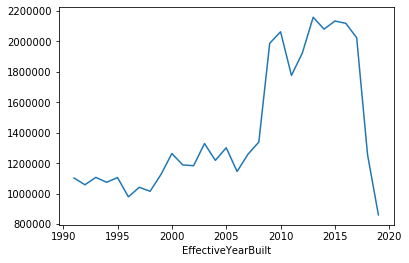

In [130]:
la_parcels[(la_parcels.PropertyType == 'SFR') & (la_parcels.EffectiveYearBuilt > 1990)].groupby('EffectiveYearBuilt')['TotalValue'].mean().plot()

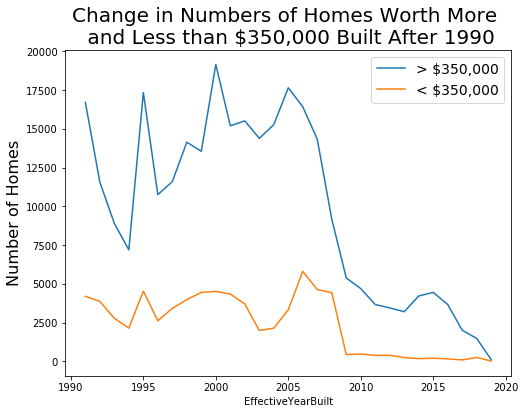

In [146]:
plt.figure(figsize=(8, 6))
la_parcels[(la_parcels.PropertyType == 'SFR') &
           (la_parcels.EffectiveYearBuilt > 1990) &
          (la_parcels.TotalValue > 350000)].groupby('EffectiveYearBuilt')['TotalValue'].count().plot()
la_parcels[(la_parcels.PropertyType == 'SFR') &
           (la_parcels.EffectiveYearBuilt > 1990) &
          (la_parcels.TotalValue < 350000)].groupby('EffectiveYearBuilt')['TotalValue'].count().plot()
plt.legend(['> $350,000', '< $350,000'], fontsize=14)
plt.title('Change in Numbers of Homes Worth More \n and Less than $350,000 Built After 1990', fontsize=20)
plt.ylabel('Number of Homes', fontsize=16)
plt.savefig('./plots/flatline.png', bbox_inches='tight', dpi=235);

### Based on your analysis, please share any changes to services, programs, or policies that the City should consider.
As we can see from the plot above, the number of homes built after the 2008/2009 housing/economic crisis plummeted. However, there was a recovery in higher priced homes in 2013, whereas lower priced homes flatlined and have stayed that way. There is a dire need for more affordable homes, not just affordable housing, the vast majority of which is provided through rental assistance for apartments (i.e. income-based apartments, Section 8, etc.). Homeownership is still one of the primary drivers of upward mobility, yet it is increasingly hard to come by.

The City of Los Angeles has 2 programs for assisting first-time homebuyers: Low Income Purchase Assistance (LIPA) and Mortgage Credit Certificate (MCC). The LIPA is broken down into two parts: one for low income homebuyers and one for moderate income homebuyers. Unfortunately, the [latter part](https://hcidla2.lacity.org/help-moderate-income-first-home-buyers) is _currently out of funds_. The City should consider refunding this program. As for the MCC, the City should consider increasing the tax credit amount, especially since the Tax Credits and Jobs Act (TCJA) that was passed by Congress lowered the amount of mortgage interest that could be deducted. 